# Sampling Distribution

## Introduction

With Variable of Intrest as 'MontlyIncome' from 'Attrition' dataset we are checking if the population distribution and sampling distribution are similar for MonthlyIncome and we also check if Standard error of mean obtained by CLT and Bootstrapping are the same

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir("C:\\Users\\R swetha\\Desktop\\Attrition")
a = pd.read_csv("attrition.csv")
#attrition



In [2]:
a.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Question 1:  Plot distribution of montly Income,this will be the population distribution of variable

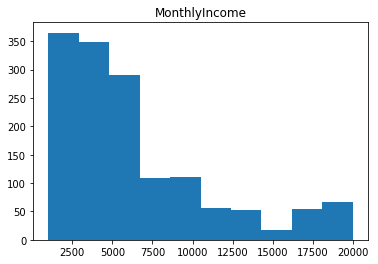

In [4]:
#pop distribution of Montly Income
a.hist(column="MonthlyIncome",grid=False)
plt.show()

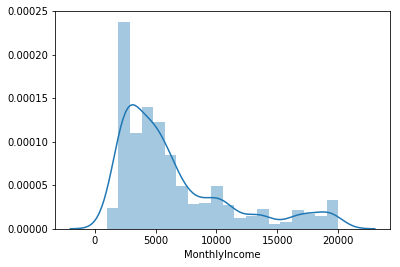

In [3]:
#pop distribution of Montly Income
sns.distplot(a['MonthlyIncome'])

In [2]:
a['MonthlyIncome'].mean()

6502.931292517007

#### Question 2:  Draw a sample of size 200 ,plot sample distribution aand comment on whether it represents the popuation distribution

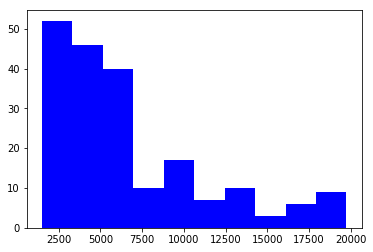

In [11]:
# random sample of size 200 from income column
np.random.seed(0)
random=a.MonthlyIncome.sample(n=200) #random variable here stores random 200 rows of column 'montly income'
random.hist(grid=False,color="Blue")
#sns.distplot(random)
#random.mean()
#random['MonthlyIncome'].mean()

    

In [ ]:
sns.distplot(random)

Observation:

Yes,the sampling distribution represents the population distribution,as the sample is also right skewed,similar to population

#### Question 3:  Draw a random sample size of 200 with replacement from the sample taken in Question2 .Plot the histogram and comment whether it represents Sample  and Population

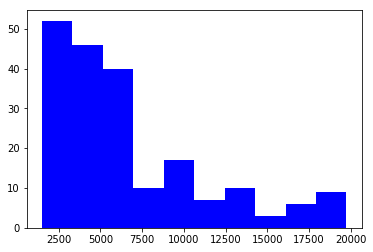

In [12]:
randomnew = random.sample(n=200,replace=True) #from random sample drawn previously ie 'random' we ll draw a new sample from it ie 'randomnew'
random.hist(grid=False,color="Blue")
#sns.distplot(randomnew)
    

Observation:
Yes,the distribution for resample(sample taken from sample) represents the population distribution and sample distribution
as we can see - the sample is right skewed which is same for both population and sample

####  Question 4 : Repeat the step 3,  10 times and note your observations

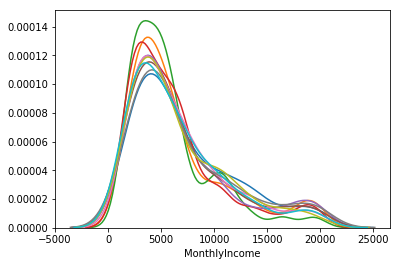

In [13]:
#drawing samples from 'random' sample and plotting graphs 10 times for each sample
for i in range(0,10):
    randomnew = random.sample(n=200,replace=True) 
    sns.distplot(randomnew,hist=False)
    

Observation:

All the 10 samples drawn have distribution similar to that of population distribution.All samples are right skewed similar to  population distribution which is also right skewed

####  Question 5:  Check if CLT holds using the variable montly Income

6502.65031225
Standard error of sample mean 333.18854016191983
Standard deviation of  population 332.9028166861796


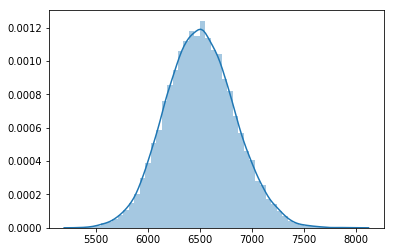

In [25]:
means=[]
for i in range(0,20000):
        randomnew=a.MonthlyIncome.sample(n=200,replace=True)  #drawing a sample of size 200 every time with replacement
        c = randomnew.mean()   #calucalting the mean for the sample 
        means.append(c)

means = np.array(means) #converting it to numpy aray
sns.distplot(means)
print(np.mean(means))
sde = np.std(means)   #standard error of all samples means'
print("Standard error of sample mean",sde)


sdpop=a.MonthlyIncome.std()
sdpop=sdpop/(200)**0.5      # standard deviation of population
print("Standard deviation of  population",sdpop)

#### Question 6: caluclate a bootstrap estimate of Standard error of average monthly income using sample s .Check whether it agrees with result of clt

In [26]:
means=[]
np.random.seed(0)
newsample=a.MonthlyIncome.sample(n=200,replace=True) #drawing sample 'newsample' of size 200 from values of MonthlyInome 
print("sample mean",np.mean(newsample))
for i in range(0,20000):
        randomnew=newsample.sample(n=200,replace=True) #drawing a sample of size 200 every time with replacement from 'newsample'
        c = randomnew.mean() #calucalting the mean for the sample
        means.append(c)

means = np.array(means)
print("Resample means",np.mean(means))
sdemean = np.std(means) #standard error of all samples means'
print("Standard error of sample mean",sdemean)


sample mean 6131.295
Resample means 6135.38834425
Standard error of sample mean 333.6074180830475


Conclusion:
The values of standard error of mean obtained in CLT and bootstrapping are the same